# **Task: Consider the following classification methods** (our L):
1.   Logistic Regression 
2.   Linear Discriminant
3.   Quadratic Discriminant
4.   RandomForest
5.   DecisionTrees
6.   SVM linear
7.   SVM rbf
8.   SVM poly
9.   MLP tanh
10.  MLP relu

• Choose all of them or a subset of them and try to find an artificial classification dataset where
that **method+configuration** is the best (or gets its best performance) or the less complex (number of
parameters) of the best. Are the results **statistically significant**?
  
• For each resulting model, try to obtain **accuracy**, **AUC**, **F1**, number of parameters/**complexity**,
**training time**. Use cross validation. Take into account random aspects of the algorithm.

• For each resulting case, try to find **explanations for why the best method is the one you found**.



In [ ]:
#Imports
from sklearn.datasets import make_moons,make_classification
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.graph_objs as go
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.tree import plot_tree
import time
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import sklearn.datasets as dt
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import cross_val_score
from numpy.random import seed
from numpy.random import rand
from numpy.random import normal
from scipy import stats
from scipy.stats import wilcoxon


seed = 11
rand_state = 11


For each resulting model, we obtain accuracy, AUC, F1, training time.

Also, we use StratisfiedKFold with 10 folds for every model. 
Split the sample in 10 segments of equal size (folds). Use all folds but one to train a model. Use the remaining fold for error assessment (validation). Get average error over folds.

With StratisfiedKFold each fold has approximately the same proportion as the whole data set.

## Dataset 1 : Using Make_Moons

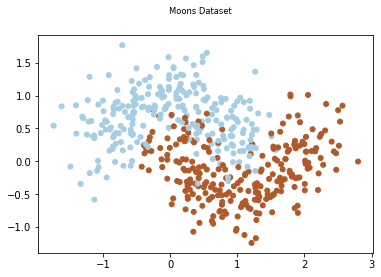

In [ ]:
# classification dataset 1

X, y = dt.make_moons(500, noise=0.3, random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,s=25,cmap="Paired")
plt.suptitle('Moons Dataset',fontsize='small')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)


In [ ]:
#LINEAR DISCRIMINANT
print('---------------------LINEAR DISCRIMINANT------------------------')

start = time.time()
modelLD= LDA().fit(X_train, y_train)
end = time.time()

values_mean_f1 = cross_val_score(modelLD, X, y, scoring="f1", cv = 10)
mean_f1 = values_mean_f1.mean()
std_f1 = values_mean_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelLD, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_LD = cross_val_score(modelLD, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_LD.mean()
std_accuracy = values_accuracy_LD.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 



#QUADRATIC DISCRIMINANT
print('---------------------QUADRATIC DISCRIMINANT------------------------')

start = time.time()
modelQD= QDA().fit(X_train,y_train)
end = time.time()

values_mean_f1 = cross_val_score(modelQD, X, y, scoring="f1", cv = 10)
mean_f1 = values_mean_f1.mean()
std_f1 = values_mean_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelQD, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_QD = cross_val_score(modelQD, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_QD.mean()
std_accuracy = values_accuracy_QD.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 


#KERNEL RBF
print('-------------------------SVM rbf---------------------------')

start = time.time()
modelKernelrbf= SVC(kernel='rbf', C=1, gamma='scale').fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelKernelrbf, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernelrbf, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernelrbf = cross_val_score(modelKernelrbf, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernelrbf.mean()
std_accuracy = values_accuracy_Kernelrbf.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 



#KERNEL LINEAR
print('------------------------SVM linear-------------------------')

start = time.time()
modelKernellinear=  SVC(kernel='linear').fit(X_train,  y_train);
end = time.time()

values_f1 =cross_val_score(modelKernellinear, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernellinear, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernellinear = cross_val_score(modelKernellinear, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernellinear.mean()
std_accuracy = values_accuracy_Kernellinear.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 

#SVM POLY
print('-----------------------------SVM POLY------------------------------')

start = time.time()
modelKernelpoly = SVC(kernel='poly',gamma=2,C=1).fit(X_train,y_train)
end = time.time()

values_f1 =cross_val_score(modelKernelpoly, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernelpoly, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernelpoly = cross_val_score(modelKernelpoly, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernelpoly.mean()
std_accuracy = values_accuracy_Kernelpoly.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n")

#LOGISTIC REGRESSION
print('-----------------------LOGISTIC REGRESSION-------------------------')

start = time.time()
modelLR = linear_model.LogisticRegression(random_state=0).fit(X_train, y_train)
end = time.time()

values_f1 = cross_val_score(modelLR, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelLR, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_LR = cross_val_score(modelLR, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_LR.mean()
std_accuracy = values_accuracy_LR.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 


#DECISION TREE
print('-----------------------DECISION TREE-------------------------')

start = time.time()
modelDTR=DTR().fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelDTR, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelDTR, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_DTR = cross_val_score(modelDTR, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_DTR.mean()
std_accuracy = values_accuracy_DTR.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n")



#MLP relu
print('-----------------------MLP relu-------------------------')

start = time.time()
modelMLPr=MLP(hidden_layer_sizes=(100,),max_iter=10000,activation='relu',learning_rate_init=0.1).fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelMLPr, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelMLPr, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_MLPr = cross_val_score(modelMLPr, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_MLPr.mean()
std_accuracy = values_accuracy_MLPr.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n") 

#MLP tanh
print('-----------------------MLP tanh-------------------------')

start = time.time()
modelMLPt=MLP(hidden_layer_sizes=(100,),max_iter=10000, activation='tanh').fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelMLPt, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelMLPt, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_MLPt = cross_val_score(modelMLPt, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_MLPt.mean()
std_accuracy = values_accuracy_MLPt.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n") 


#Melhor é SVM rbf e MLP relu, mas SVM rbf tem um tempo muito inferior ao MLP relu.

---------------------LINEAR DISCRIMINANT------------------------
F1 score :  0.8377986392719926  +/-  0.03462928835247081
roc_auc score :  0.9396799999999998  +/-  0.027285043522047
accuracy score :  0.8380000000000001  +/-  0.03627671429443411
training time :  0.0026 seconds



---------------------QUADRATIC DISCRIMINANT------------------------
F1 score :  0.8394830364351131  +/-  0.03270035517323313
roc_auc score :  0.9385600000000001  +/-  0.02671760468305496
accuracy score :  0.8400000000000001  +/-  0.03464101615137756
training time :  0.0007 seconds



-------------------------SVM rbf---------------------------
F1 score :  0.9137629677899219  +/-  0.032684613491001595
roc_auc score :  0.9689599999999998  +/-  0.015165434382173142
accuracy score :  0.916  +/-  0.02939387691339812
training time :  0.0045 seconds



------------------------SVM linear-------------------------
F1 score :  0.8419604963802136  +/-  0.03177794646585917
roc_auc score :  0.9385600000000001  +/-  0.02840799

# **Measuring statistical significance**

Use Hypothesis testing. The null hypothesis states the results are due to chance and are not significant in terms of supporting the idea being investigated. Thus, the null hypothesis assumes that whatever you are trying to prove did not happen.

10 fold CV using t-test.

**H0** or Null hypothesis: The difference in the accuracies is **not significant**.

The t-test checks if we can reject H0. **Level of significance of 5%**.




In [ ]:

t_result = stats.ttest_ind(values_accuracy_Kernelrbf, values_accuracy_Kernellinear)
print('p-value ( Kernelrbf , Kernellinear): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_Kernelrbf, values_accuracy_LR)
print('p-value ( Kernelrbf , LR): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_Kernelrbf, values_accuracy_DTR)
print('p-value ( Kernelrbf , DTR): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_Kernelrbf, values_accuracy_LD)
print('p-value ( Kernelrbf , LD): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_Kernelrbf, values_accuracy_QD)
print('p-value ( Kernelrbf , QD): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_Kernelrbf, values_accuracy_Kernelpoly)
print('p-value ( Kernelrbf , Kernelpoly): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_Kernelrbf, values_accuracy_MLPr)
print('p-value ( Kernelrbf , MLPr): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_Kernelrbf , values_accuracy_MLPt)
print('p-value ( Kernelrbf , MLPt): ',t_result[1])


p-value ( Kernelrbf , Kernellinear):  9.883719321848119e-05
p-value ( Kernelrbf , LR):  0.00013295177149013032
p-value ( Kernelrbf , DTR):  0.021044920380088112
p-value ( Kernelrbf , LD):  9.05148889064941e-05
p-value ( Kernelrbf , QD):  8.918557141430592e-05
p-value ( Kernelrbf , Kernelpoly):  2.469085184451407e-05
p-value ( Kernelrbf , MLPr):  0.5350414165670172
p-value ( Kernelrbf , MLPt):  0.00013295177149013032


Since the **p-values are smaller than 0.05** it is **statistically significant**. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random).

##Dataset 2 : Using Make_Circles


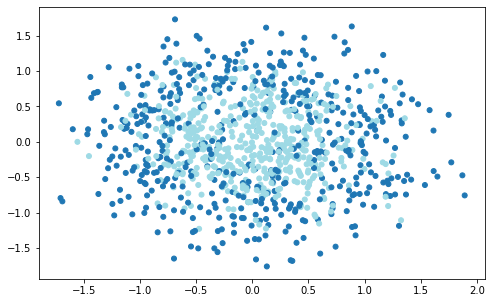

In [ ]:
# classification dataset 2
fig = plt.figure(figsize=(8,5))

X, y = dt.make_circles(1000, factor=0.5, noise=.35, random_state=45)
y=y[X[:,1]<5]
X=X[X[:,1]<5,:]

plt.scatter(X[:,0],X[:,1],c=y,s=25,cmap="tab20")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#LINEAR DISCRIMINANT
print('---------------------LINEAR DISCRIMINANT------------------------')

start = time.time()
modelLD= LDA().fit(X_train, y_train)
end = time.time()

values_mean_f1 = cross_val_score(modelLD, X, y, scoring="f1", cv = 10)
mean_f1 = values_mean_f1.mean()
std_f1 = values_mean_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelLD, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_LD = cross_val_score(modelLD, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_LD.mean()
std_accuracy = values_accuracy_LD.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 


#QUADRATIC DISCRIMINANT
print('---------------------QUADRATIC DISCRIMINANT------------------------')

start = time.time()
modelQD= QDA().fit(X_train,y_train)
end = time.time()

values_mean_f1 = cross_val_score(modelQD, X, y, scoring="f1", cv = 10)
mean_f1 = values_mean_f1.mean()
std_f1 = values_mean_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelQD, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_QD = cross_val_score(modelQD, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_QD.mean()
std_accuracy = values_accuracy_QD.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 


#KERNEL RBF
print('-------------------------SVM rbf---------------------------')

start = time.time()
modelKernelrbf= SVC(kernel='rbf', C=1, gamma='scale').fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelKernelrbf, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernelrbf, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernelrbf = cross_val_score(modelKernelrbf, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernelrbf.mean()
std_accuracy = values_accuracy_Kernelrbf.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 



#KERNEL LINEAR
print('------------------------SVM linear-------------------------')

start = time.time()
modelKernellinear=  SVC(kernel='linear').fit(X_train,  y_train);
end = time.time()

values_f1 =cross_val_score(modelKernellinear, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernellinear, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernellinear = cross_val_score(modelKernellinear, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernellinear.mean()
std_accuracy = values_accuracy_Kernellinear.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 

#SVM POLY
print('-----------------------------SVM POLY------------------------------')

start = time.time()
modelKernelpoly = SVC(kernel='poly').fit(X_train,y_train)
end = time.time()

values_f1 =cross_val_score(modelKernelpoly, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernelpoly, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernelpoly = cross_val_score(modelKernelpoly, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernelpoly.mean()
std_accuracy = values_accuracy_Kernelpoly.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n")

#LOGISTIC REGRESSION
print('-----------------------LOGISTIC REGRESSION-------------------------')

start = time.time()
modelLR = linear_model.LogisticRegression(random_state=0).fit(X_train, y_train)
end = time.time()

values_f1 = cross_val_score(modelLR, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelLR, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_LR = cross_val_score(modelLR, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_LR.mean()
std_accuracy = values_accuracy_LR.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 


#DECISION TREE
print('-----------------------DECISION TREE-------------------------')

start = time.time()
modelDTR=DTR().fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelDTR, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelDTR, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_DTR = cross_val_score(modelDTR, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_DTR.mean()
std_accuracy = values_accuracy_DTR.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n")



#MLP relu
print('-----------------------MLP relu-------------------------')

start = time.time()
modelMLPr=MLP(hidden_layer_sizes=(100,),max_iter=10000,activation='relu',learning_rate_init=0.1).fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelMLPr, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelMLPr, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_MLPr = cross_val_score(modelMLPr, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_MLPr.mean()
std_accuracy = values_accuracy_MLPr.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n") 

#MLP tanh
print('-----------------------MLP tanh-------------------------')

start = time.time()
modelMLPt=MLP(hidden_layer_sizes=(100,),max_iter=10000, activation='tanh').fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelMLPt, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelMLPt, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_MLPt = cross_val_score(modelMLPt, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_MLPt.mean()
std_accuracy = values_accuracy_MLPt.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n") 


#Melhor é o Quadractic Discriminant, SVM rbf e MLP relu/tanh , mas o Quadractic Discriminant demora muito menos tempo ! 

---------------------LINEAR DISCRIMINANT------------------------
F1 score :  0.4965444285918833  +/-  0.04252849157873969
roc_auc score :  0.46992  +/-  0.027790530761394237
accuracy score :  0.483  +/-  0.023685438564654028
training time :  0.0015 seconds



---------------------QUADRATIC DISCRIMINANT------------------------
F1 score :  0.7622961457927687  +/-  0.03677634101320651
roc_auc score :  0.8114400000000002  +/-  0.048455571403090494
accuracy score :  0.7549999999999999  +/-  0.03528455752875473
training time :  0.0031 seconds



-------------------------SVM rbf---------------------------
F1 score :  0.7563431151134216  +/-  0.0383544995813219
roc_auc score :  0.8107599999999999  +/-  0.04948194013981266
accuracy score :  0.7539999999999999  +/-  0.035832945734337866
training time :  0.0194 seconds



------------------------SVM linear-------------------------
F1 score :  0.5619880046459449  +/-  0.049016532196821005
roc_auc score :  0.46784  +/-  0.03218407059400658
accuracy

In [ ]:
t_result = stats.ttest_ind(values_accuracy_QD, values_accuracy_Kernellinear)
print('p-value ( values_accuracy_QD , Kernellinear): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_QD, values_accuracy_LR)
print('p-value ( values_accuracy_QD , LR): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_QD, values_accuracy_DTR)
print('p-value ( Kevalues_accuracy_QD , DTR): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_QD, values_accuracy_Kernelrbf)
print('p-value ( values_accuracy_QD , Kernelrbf): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_QD, values_accuracy_LD)
print('p-value ( values_accuracy_QD , LD): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_QD, values_accuracy_Kernelpoly)
print('p-value ( values_accuracy_QD , Kernelpoly): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_QD, values_accuracy_MLPr)
print('p-value ( values_accuracy_QD , MLPr): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_QD , values_accuracy_MLPt)
print('p-value ( values_accuracy_QD , MLPt): ',t_result[1])

p-value ( values_accuracy_QD , Kernellinear):  1.3885605349248152e-11
p-value ( values_accuracy_QD , LR):  1.9442272536045632e-13
p-value ( Kevalues_accuracy_QD , DTR):  4.785193665535589e-06
p-value ( values_accuracy_QD , Kernelrbf):  0.9530877449035711
p-value ( values_accuracy_QD , LD):  1.9442272536045632e-13
p-value ( values_accuracy_QD , Kernelpoly):  2.9105889000987345e-11
p-value ( values_accuracy_QD , MLPr):  0.5584634988779686
p-value ( values_accuracy_QD , MLPt):  0.34078510546168583


## Dataset 3 : Using Make_Classification

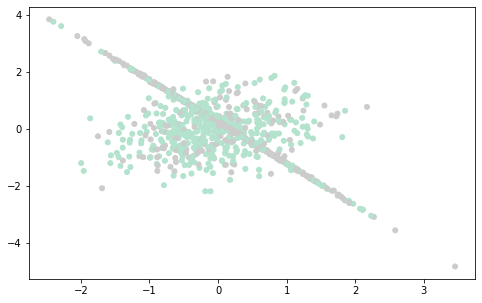

In [ ]:
# classification dataset 3
fig = plt.figure(figsize=(8,5))

nb_samples = 1000

X, y = make_classification(n_samples=nb_samples, n_features=3, n_informative=2, n_redundant=0, n_classes=2, 
                           n_clusters_per_class=1,flip_y = 0.5, class_sep= 0.1,random_state=69)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, cmap="Pastel2")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:

#LINEAR DISCRIMINANT
print('---------------------LINEAR DISCRIMINANT------------------------')

start = time.time()
modelLD= LDA().fit(X_train, y_train)
end = time.time()

values_mean_f1 = cross_val_score(modelLD, X, y, scoring="f1", cv = 10)
mean_f1 = values_mean_f1.mean()
std_f1 = values_mean_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelLD, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_LD = cross_val_score(modelLD, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_LD.mean()
std_accuracy = values_accuracy_LD.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 


#QUADRATIC DISCRIMINANT
print('---------------------QUADRATIC DISCRIMINANT------------------------')

start = time.time()
modelQD= QDA().fit(X_train,y_train)
end = time.time()

values_mean_f1 = cross_val_score(modelQD, X, y, scoring="f1", cv = 10)
mean_f1 = values_mean_f1.mean()
std_f1 = values_mean_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelQD, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_QD = cross_val_score(modelQD, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_QD.mean()
std_accuracy = values_accuracy_QD.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 


#KERNEL RBF
print('-------------------------SVM rbf---------------------------')

start = time.time()
modelKernelrbf= SVC(kernel='rbf', C=1, gamma='scale').fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelKernelrbf, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernelrbf, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernelrbf = cross_val_score(modelKernelrbf, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernelrbf.mean()
std_accuracy = values_accuracy_Kernelrbf.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 



#KERNEL LINEAR
print('------------------------SVM linear-------------------------')

start = time.time()
modelKernellinear=  SVC(kernel='linear').fit(X_train,  y_train);
end = time.time()

values_f1 =cross_val_score(modelKernellinear, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernellinear, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernellinear = cross_val_score(modelKernellinear, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernellinear.mean()
std_accuracy = values_accuracy_Kernellinear.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 

#SVM POLY
print('-----------------------------SVM POLY------------------------------')

start = time.time()
modelKernelpoly = SVC(kernel='poly').fit(X_train,y_train)
end = time.time()

values_f1 =cross_val_score(modelKernelpoly, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernelpoly, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernelpoly = cross_val_score(modelKernelpoly, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernelpoly.mean()
std_accuracy = values_accuracy_Kernelpoly.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n")

#LOGISTIC REGRESSION
print('-----------------------LOGISTIC REGRESSION-------------------------')

start = time.time()
modelLR = linear_model.LogisticRegression(random_state=0).fit(X_train, y_train)
end = time.time()

values_f1 = cross_val_score(modelLR, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelLR, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_LR = cross_val_score(modelLR, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_LR.mean()
std_accuracy = values_accuracy_LR.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 


#DECISION TREE
print('-----------------------DECISION TREE-------------------------')

start = time.time()
modelDTR=DTR().fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelDTR, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelDTR, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_DTR = cross_val_score(modelDTR, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_DTR.mean()
std_accuracy = values_accuracy_DTR.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n")



#MLP relu
print('-----------------------MLP relu-------------------------')

start = time.time()
modelMLPr=MLP(hidden_layer_sizes=(100,),max_iter=10000,activation='relu',learning_rate_init=0.1).fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelMLPr, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelMLPr, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_MLPr = cross_val_score(modelMLPr, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_MLPr.mean()
std_accuracy = values_accuracy_MLPr.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n") 

#MLP tanh
print('-----------------------MLP tanh-------------------------')

start = time.time()
modelMLPt=MLP(hidden_layer_sizes=(100,),max_iter=10000, activation='tanh').fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelMLPt, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelMLPt, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_MLPt = cross_val_score(modelMLPt, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_MLPt.mean()
std_accuracy = values_accuracy_MLPt.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n") 

#Os melhores foram MLP Tanh, Quadractic , MLP relu, mas o MLP relu tem um tempo muito mais rápido que MLP tanh , e o MLP relu tem melhores F1 score e roc_auc score que o Quadratic Discriminant.

---------------------LINEAR DISCRIMINANT------------------------
F1 score :  0.687337453462438  +/-  0.03455040968803263
roc_auc score :  0.5584320747529781  +/-  0.041400627866557634
accuracy score :  0.6100000000000001  +/-  0.038729833462074176
training time :  0.0018 seconds



---------------------QUADRATIC DISCRIMINANT------------------------
F1 score :  0.694108907586628  +/-  0.03682479059839209
roc_auc score :  0.6830879948133098  +/-  0.04427296066223971
accuracy score :  0.626  +/-  0.04454211490264018
training time :  0.0018 seconds



-------------------------SVM rbf---------------------------
F1 score :  0.6891477561410158  +/-  0.030527986487209488
roc_auc score :  0.6405635331055499  +/-  0.029177362235925472
accuracy score :  0.615  +/-  0.039560080889704974
training time :  0.0226 seconds



------------------------SVM linear-------------------------
F1 score :  0.6929588132024115  +/-  0.025761810969784367
roc_auc score :  0.5593924108104781  +/-  0.04204405963805676

In [ ]:
t_result = stats.ttest_ind(values_accuracy_MLPr , values_accuracy_Kernelrbf)
print('p-value ( values_accuracy_MLPr , Kernelrbf): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPr , values_accuracy_LR)
print('p-value ( values_accuracy_MLPr , LR): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPr , values_accuracy_DTR)
print('p-value ( values_accuracy_MLPr , DTR): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPr , values_accuracy_LD)
print('p-value ( values_accuracy_MLPr , LD): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPr , values_accuracy_QD)
print('p-value ( values_accuracy_MLPr , QD): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPr , values_accuracy_Kernelpoly)
print('p-value ( values_accuracy_MLPr , Kernelpoly): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPr , values_accuracy_Kernellinear)
print('p-value ( values_accuracy_MLPr , Kernellinear): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPr , values_accuracy_MLPt)
print('p-value ( values_accuracy_MLPr , MLPt): ',t_result[1])

p-value ( values_accuracy_MLPr , Kernellinear):  0.020388804115121718
p-value ( values_accuracy_MLPr , LR):  0.01025047231764475
p-value ( values_accuracy_MLPr , DTR):  0.003453108505755845
p-value ( values_accuracy_MLPr , LD):  0.01025047231764475
p-value ( values_accuracy_MLPr , QD):  0.09291642005877902
p-value ( values_accuracy_MLPr , Kernelpoly):  0.00033839383099184157
p-value ( values_accuracy_MLPr , Kernellinear):  0.0004900048609362015
p-value ( values_accuracy_MLPr , MLPt):  0.0769470919797089


## Using Make_classification


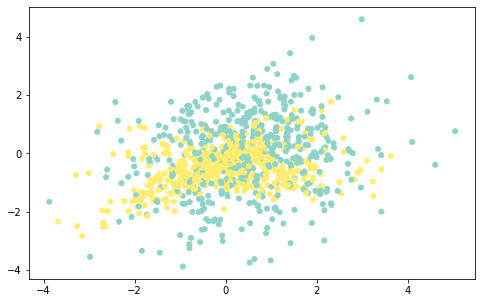

In [ ]:
# classification dataset 5
fig = plt.figure(figsize=(8,5))

nb_samples = 1000
X, y = make_classification(n_samples=nb_samples, n_features=3, n_informative=3, n_redundant=0, n_classes=2, flip_y = 0.001, class_sep= 0.45,random_state=46)


plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, cmap="Set3")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
#LINEAR DISCRIMINANT
print('---------------------LINEAR DISCRIMINANT------------------------')

start = time.time()
modelLD= LDA().fit(X_train, y_train)
end = time.time()

values_mean_f1 = cross_val_score(modelLD, X, y, scoring="f1", cv = 10)
mean_f1 = values_mean_f1.mean()
std_f1 = values_mean_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelLD, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_LD = cross_val_score(modelLD, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_LD.mean()
std_accuracy = values_accuracy_LD.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 



#QUADRATIC DISCRIMINANT
print('---------------------QUADRATIC DISCRIMINANT------------------------')

start = time.time()
modelQD= QDA().fit(X_train,y_train)
end = time.time()

values_mean_f1 = cross_val_score(modelQD, X, y, scoring="f1", cv = 10)
mean_f1 = values_mean_f1.mean()
std_f1 = values_mean_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelQD, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_QD = cross_val_score(modelQD, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_QD.mean()
std_accuracy = values_accuracy_QD.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 


#KERNEL RBF
print('-------------------------SVM rbf---------------------------')

start = time.time()
modelKernelrbf= SVC(kernel='rbf', C=1, gamma='scale').fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelKernelrbf, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernelrbf, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernelrbf = cross_val_score(modelKernelrbf, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernelrbf.mean()
std_accuracy = values_accuracy_Kernelrbf.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 



#KERNEL LINEAR
print('------------------------SVM linear-------------------------')

start = time.time()
modelKernellinear=  SVC(kernel='linear').fit(X_train,  y_train);
end = time.time()

values_f1 =cross_val_score(modelKernellinear, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernellinear, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernellinear = cross_val_score(modelKernellinear, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernellinear.mean()
std_accuracy = values_accuracy_Kernellinear.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 

#SVM POLY
print('-----------------------------SVM POLY------------------------------')

start = time.time()
modelKernelpoly = SVC(kernel='poly',gamma=2,C=1).fit(X_train,y_train)
end = time.time()

values_f1 =cross_val_score(modelKernelpoly, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelKernelpoly, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_Kernelpoly = cross_val_score(modelKernelpoly, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_Kernelpoly.mean()
std_accuracy = values_accuracy_Kernelpoly.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n")

#LOGISTIC REGRESSION
print('-----------------------LOGISTIC REGRESSION-------------------------')

start = time.time()
modelLR = linear_model.LogisticRegression(random_state=0).fit(X_train, y_train)
end = time.time()

values_f1 = cross_val_score(modelLR, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelLR, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_LR = cross_val_score(modelLR, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_LR.mean()
std_accuracy = values_accuracy_LR.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n\n\n") 


#DECISION TREE
print('-----------------------DECISION TREE-------------------------')

start = time.time()
modelDTR=DTR().fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelDTR, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelDTR, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_DTR = cross_val_score(modelDTR, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_DTR.mean()
std_accuracy = values_accuracy_DTR.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n")



#MLP relu
print('-----------------------MLP relu-------------------------')

start = time.time()
modelMLPr=MLP(hidden_layer_sizes=(100,),max_iter=10000,activation='relu',learning_rate_init=0.1).fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelMLPr, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelMLPr, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_MLPr = cross_val_score(modelMLPr, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_MLPr.mean()
std_accuracy = values_accuracy_MLPr.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n") 

#MLP tanh
print('-----------------------MLP tanh-------------------------')

start = time.time()
modelMLPt=MLP(hidden_layer_sizes=(100,),max_iter=10000, activation='tanh',learning_rate_init=0.1).fit(X_train,y_train)
end = time.time()

values_f1 = cross_val_score(modelMLPt, X, y, scoring="f1", cv = 10)
mean_f1 = values_f1.mean()
std_f1 = values_f1.std()
print('F1 score : ',mean_f1, ' +/- ', std_f1)

values_roc_auc = cross_val_score(modelMLPt, X, y, scoring="roc_auc", cv = 10)
mean_roc_auc = values_roc_auc.mean()
std_roc_auc = values_roc_auc.std()
print('roc_auc score : ',mean_roc_auc, ' +/- ', std_roc_auc)

values_accuracy_MLPt = cross_val_score(modelMLPt, X, y, scoring="accuracy", cv = 10)
mean_accuracy = values_accuracy_MLPt.mean()
std_accuracy = values_accuracy_MLPt.std()
print('accuracy score : ',mean_accuracy, ' +/- ', std_accuracy)

print('training time : ',np.round(end - start,4), "seconds\n") 


---------------------LINEAR DISCRIMINANT------------------------
F1 score :  0.6298204061929301  +/-  0.04926079977674718
roc_auc score :  0.6613835134053621  +/-  0.047043455212846155
accuracy score :  0.628  +/-  0.04308131845707607
training time :  0.0026 seconds



---------------------QUADRATIC DISCRIMINANT------------------------
F1 score :  0.7546166986280497  +/-  0.02730213555659265
roc_auc score :  0.7965086674669868  +/-  0.04481626507084641
accuracy score :  0.728  +/-  0.03682390527904394
training time :  0.0046 seconds



-------------------------SVM rbf---------------------------
F1 score :  0.8150456796498936  +/-  0.01975211027253207
roc_auc score :  0.875272557022809  +/-  0.03217766787487402
accuracy score :  0.797  +/-  0.024919871588754205
training time :  0.0193 seconds



------------------------SVM linear-------------------------
F1 score :  0.688878859748425  +/-  0.04211156964715596
roc_auc score :  0.6565032893157263  +/-  0.04452362636914758
accuracy score :

In [ ]:
t_result = stats.ttest_ind(values_accuracy_MLPt , values_accuracy_Kernelrbf)
print('p-value ( MLP tanh , Kernelrbf): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPt , values_accuracy_LR)
print('p-value ( MLP tanh , LR): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPt , values_accuracy_DTR)
print('p-value ( MLP tanh , DTR): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPt , values_accuracy_LD)
print('p-value ( MLP tanh , LD): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPt , values_accuracy_QD)
print('p-value ( MLP tanh , QD): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPt , values_accuracy_Kernelpoly)
print('p-value ( MLP tanh , Kernelpoly): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPt , values_accuracy_Kernellinear)
print('p-value ( MLP tanh , Kernellinear): ',t_result[1])

t_result = stats.ttest_ind(values_accuracy_MLPt , values_accuracy_MLPr)
print('p-value ( MLP tanh , MLPr): ',t_result[1])

p-value ( MLP tanh , Kernelrbf):  0.006721191856031205
p-value ( MLP tanh , LR):  9.545371216915585e-11
p-value ( MLP tanh , DTR):  1.2390865628479942e-06
p-value ( MLP tanh , LD):  2.363559008281266e-10
p-value ( MLP tanh , QD):  1.0747265273938869e-06
p-value ( MLP tanh , Kernelpoly):  8.778755933904717e-06
p-value ( MLP tanh , Kernellinear):  2.257547663718786e-09
p-value ( MLP tanh , MLPr):  0.04562154625171601
